In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_moons
import mglearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

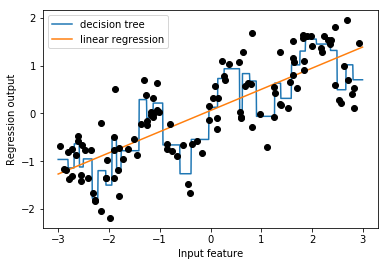

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


In [10]:

from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)

print("bin edges: \n", kb.bin_edges_)


ImportError: cannot import name 'KBinsDiscretizer'

In [11]:
bins=np.linspace(-3,3,11)
print('bins:{}'.format(bins))

bins:[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [12]:
which_bins=np.digitize(X,bins=bins)
print(X[:5],which_bins[:5])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]] [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
encoder.fit(which_bins)
X_binned=encoder.transform(which_bins)
print(X_binned[:5])


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
X_binned.shape

(120, 10)

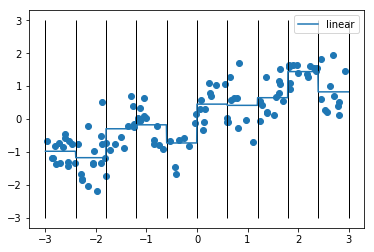

In [19]:
line_binned=encoder.transform(np.digitize(line,bins=bins))
reg=LinearRegression()
reg.fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label='linear',)
tree=DecisionTreeRegressor(min_samples_split=3)
tree.fit(X_binned,y)
# plt.plot(line,tree.predict(line_binned),label='tree')
plt.vlines(bins,-3,3,linewidth=1)
plt.scatter(X,y)
plt.legend(loc='best')


In [21]:
X_combine=np.hstack([X_binned,X])
X_combine.shape

(120, 11)

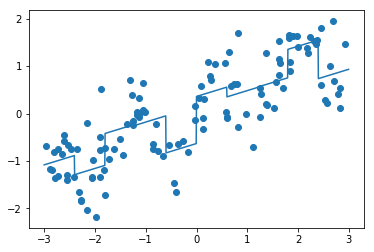

In [23]:
lr=LinearRegression()
lr.fit(X_combine,y)
line_combine=np.hstack([line_binned,line])
plt.scatter(X,y)
plt.plot(line,lr.predict(line_combine))

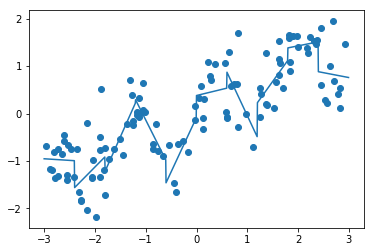

In [24]:
X_pro=np.hstack([X_binned,X_binned*X])
line_pro=np.hstack([line_binned,line_binned*line])
plt.scatter(X,y)
plt.plot(line,lr.fit(X_pro,y).predict(line_pro))

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10,include_bias=False)
poly.fit(X)
X_poly=poly.transform(X)
X_poly.shape

(120, 10)

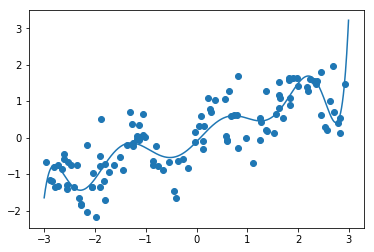

In [27]:
lr.fit(X_poly,y)
plt.scatter(X,y)
plt.plot(line,lr.predict(poly.transform(line)))

In [4]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures


boston=load_boston()
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,random_state=0)

scaler=MinMaxScaler()
X_train_sca=scaler.fit_transform(X_train)
X_test_sca=scaler.fit_transform(X_test)
print(X_test_sca.shape,X_train_sca.shape)

(127, 13) (379, 13)


In [5]:
poly=PolynomialFeatures(degree=2)
poly.fit(X_train_sca)
X_train_poly=poly.transform(X_train_sca)
X_test_poly=poly.transform(X_test_sca)
print(X_test_poly.shape,X_train_poly.shape)

(127, 105) (379, 105)


In [33]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x1

In [6]:
from sklearn.linear_model import Ridge
ri=Ridge()
ri.fit(X_train_sca,y_train)
print(ri.score(X_test_sca,y_test))
ri.fit(X_train_poly,y_train)
print(ri.score(X_test_poly,y_test))

0.5768611445540042
0.7411219642018823


In [10]:
from sklearn.ensemble import RandomForestRegressor
tree=RandomForestRegressor(n_estimators=100)
tree.fit(X_train_sca,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
print(tree.score(X_test_sca,y_test))
tree.fit(X_train_poly,y_train)
print(tree.score(X_test_poly,y_test))

0.7975793674237042


0.7353368664586682
